### General Adversarial Networks Implementation using numpy
Paper:

https://arxiv.org/abs/1406.2661

In [1]:
#import packages
import numpy as np,sys,time
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np,sys
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
np.random.seed(100)

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\tensorflow\

In [2]:
#imlementation of basic method
def ReLu(x):
    mask = (x>0) * 1.0
    return mask *x
def d_ReLu(x):
    mask = (x>0) * 1.0
    return mask 

def arctan(x):
    return np.arctan(x)
def d_arctan(x):
    return 1 / (1 + x ** 2)

def log(x):
    return 1 / ( 1+ np.exp(-1*x))
def d_log(x):
    return log(x) * (1 - log(x))

def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return 1 - np.tanh(x) ** 2

In [3]:
#plot method
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [4]:
# 1. Load Data and declare hyper
print('--------- Load Data ----------')
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
temp = mnist.test
images, labels = temp.images, temp.labels
images, labels = shuffle(np.asarray(images),np.asarray(labels))
num_epoch = 10
learing_rate = 0.00009
G_input = 100
hidden_input,hidden_input2,hidden_input3 = 128,256,346
hidden_input4,hidden_input5,hidden_input6 = 480,560,686

--------- Load Data ----------
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
print('--------- Declare Hyper Parameters ----------')
# 2. Declare Weights
D_W1 = np.random.normal(size=(784,hidden_input),scale=(1. / np.sqrt(784 / 2.)))   *0.002
# D_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))       *0.002
D_b1 = np.zeros(hidden_input)

D_W2 = np.random.normal(size=(hidden_input,1),scale=(1. / np.sqrt(hidden_input / 2.)))     *0.002
# D_b2 = np.random.normal(size=(1),scale=(1. / np.sqrt(1 / 2.)))           *0.002
D_b2 = np.zeros(1)


G_W1 = np.random.normal(size=(G_input,hidden_input),scale=(1. / np.sqrt(G_input / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b1 = np.zeros(hidden_input)

G_W2 = np.random.normal(size=(hidden_input,hidden_input2),scale=(1. / np.sqrt(hidden_input / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b2 = np.zeros(hidden_input2)

G_W3 = np.random.normal(size=(hidden_input2,hidden_input3),scale=(1. / np.sqrt(hidden_input2 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b3 = np.zeros(hidden_input3)

G_W4 = np.random.normal(size=(hidden_input3,hidden_input4),scale=(1. / np.sqrt(hidden_input3 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b4 = np.zeros(hidden_input4)

G_W5 = np.random.normal(size=(hidden_input4,hidden_input5),scale=(1. / np.sqrt(hidden_input4 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b5 = np.zeros(hidden_input5)

G_W6 = np.random.normal(size=(hidden_input5,hidden_input6),scale=(1. / np.sqrt(hidden_input5 / 2.)))   *0.002
# G_b1 = np.random.normal(size=(128),scale=(1. / np.sqrt(128 / 2.)))      *0.002
G_b6 = np.zeros(hidden_input6)

G_W7 = np.random.normal(size=(hidden_input6,784),scale=(1. / np.sqrt(hidden_input6 / 2.)))  *0.002
# G_b2 = np.random.normal(size=(784),scale=(1. / np.sqrt(784 / 2.)))      *0.002
G_b7 = np.zeros(784)

--------- Declare Hyper Parameters ----------


In [7]:
# 3. For Adam Optimzier
v1,m1 = 0,0
v2,m2 = 0,0
v3,m3 = 0,0
v4,m4 = 0,0

v5,m5 = 0,0
v6,m6 = 0,0
v7,m7 = 0,0
v8,m8 = 0,0
v9,m9 = 0,0
v10,m10 = 0,0
v11,m11 = 0,0
v12,m12 = 0,0

v13,m13 = 0,0
v14,m14 = 0,0

v15,m15 = 0,0
v16,m16 = 0,0

v17,m17 = 0,0
v18,m18 = 0,0
beta_1,beta_2,eps = 0.9,0.999,0.00000001

--------- Started Training ----------
--------- Show Example Result See Tab Above ----------
--------- Wait for the image to load ---------


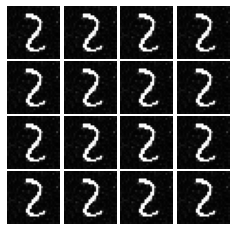

In [8]:
print('--------- Started Training ----------')
for iter in range(num_epoch):

    random_int = np.random.randint(len(images) - 5)
    current_image = np.expand_dims(images[random_int],axis=0)

    # Func: Generate The first Fake Data
    Z = np.random.uniform(-1., 1., size=[1, G_input])
    Gl1 = Z.dot(G_W1) + G_b1
    Gl1A = arctan(Gl1)
    Gl2 = Gl1A.dot(G_W2) + G_b2
    Gl2A = ReLu(Gl2)
    Gl3 = Gl2A.dot(G_W3) + G_b3
    Gl3A = arctan(Gl3)

    Gl4 = Gl3A.dot(G_W4) + G_b4
    Gl4A = ReLu(Gl4)
    Gl5 = Gl4A.dot(G_W5) + G_b5
    Gl5A = tanh(Gl5)
    Gl6 = Gl5A.dot(G_W6) + G_b6
    Gl6A = ReLu(Gl6)
    Gl7 = Gl6A.dot(G_W7) + G_b7

    current_fake_data = log(Gl7)

    # Func: Forward Feed for Real data
    Dl1_r = current_image.dot(D_W1) + D_b1
    Dl1_rA = ReLu(Dl1_r)
    Dl2_r = Dl1_rA.dot(D_W2) + D_b2
    Dl2_rA = log(Dl2_r)

    # Func: Forward Feed for Fake Data
    Dl1_f = current_fake_data.dot(D_W1) + D_b1
    Dl1_fA = ReLu(Dl1_f)
    Dl2_f = Dl1_fA.dot(D_W2) + D_b2
    Dl2_fA = log(Dl2_f)

    # Func: Cost D
    D_cost = -np.log(Dl2_rA) + np.log(1.0- Dl2_fA)

    # Func: Gradient
    grad_f_w2_part_1 =  1/(1.0- Dl2_fA)
    grad_f_w2_part_2 =  d_log(Dl2_f)
    grad_f_w2_part_3 =   Dl1_fA
    grad_f_w2 =       grad_f_w2_part_3.T.dot(grad_f_w2_part_1 * grad_f_w2_part_2) 
    grad_f_b2 = grad_f_w2_part_1 * grad_f_w2_part_2

    grad_f_w1_part_1 =  (grad_f_w2_part_1 * grad_f_w2_part_2).dot(D_W2.T)
    grad_f_w1_part_2 =  d_ReLu(Dl1_f)
    grad_f_w1_part_3 =   current_fake_data
    grad_f_w1 =       grad_f_w1_part_3.T.dot(grad_f_w1_part_1 * grad_f_w1_part_2) 
    grad_f_b1 =      grad_f_w1_part_1 * grad_f_w1_part_2

    grad_r_w2_part_1 =  - 1/Dl2_rA
    grad_r_w2_part_2 =  d_log(Dl2_r)
    grad_r_w2_part_3 =   Dl1_rA
    grad_r_w2 =       grad_r_w2_part_3.T.dot(grad_r_w2_part_1 * grad_r_w2_part_2) 
    grad_r_b2 =       grad_r_w2_part_1 * grad_r_w2_part_2

    grad_r_w1_part_1 =  (grad_r_w2_part_1 * grad_r_w2_part_2).dot(D_W2.T)
    grad_r_w1_part_2 =  d_ReLu(Dl1_r)
    grad_r_w1_part_3 =   current_image
    grad_r_w1 =       grad_r_w1_part_3.T.dot(grad_r_w1_part_1 * grad_r_w1_part_2) 
    grad_r_b1 =       grad_r_w1_part_1 * grad_r_w1_part_2

    grad_w1 =grad_f_w1 + grad_r_w1
    grad_b1 =grad_f_b1 + grad_r_b1
    
    grad_w2 =grad_f_w2 + grad_r_w2
    grad_b2 =grad_f_b2 + grad_r_b2

    # ---- Update Gradient ----
    m1 = beta_1 * m1 + (1 - beta_1) * grad_w1
    v1 = beta_2 * v1 + (1 - beta_2) * grad_w1 ** 2

    m2 = beta_1 * m2 + (1 - beta_1) * grad_b1
    v2 = beta_2 * v2 + (1 - beta_2) * grad_b1 ** 2

    m3 = beta_1 * m3 + (1 - beta_1) * grad_w2
    v3 = beta_2 * v3 + (1 - beta_2) * grad_w2 ** 2

    m4 = beta_1 * m4 + (1 - beta_1) * grad_b2
    v4 = beta_2 * v4 + (1 - beta_2) * grad_b2 ** 2

    D_W1 = D_W1 - (learing_rate / (np.sqrt(v1 /(1-beta_2) ) + eps)) * (m1/(1-beta_1))
    D_b1 = D_b1 - (learing_rate / (np.sqrt(v2 /(1-beta_2) ) + eps)) * (m2/(1-beta_1))
    
    D_W2 = D_W2 - (learing_rate / (np.sqrt(v3 /(1-beta_2) ) + eps)) * (m3/(1-beta_1))
    D_b2 = D_b2 - (learing_rate / (np.sqrt(v4 /(1-beta_2) ) + eps)) * (m4/(1-beta_1))

    # Func: Forward Feed for G
    Z = np.random.uniform(-1., 1., size=[1, G_input])
    Gl1 = Z.dot(G_W1) + G_b1
    Gl1A = arctan(Gl1)
    Gl2 = Gl1A.dot(G_W2) + G_b2
    Gl2A = ReLu(Gl2)
    Gl3 = Gl2A.dot(G_W3) + G_b3
    Gl3A = arctan(Gl3)

    Gl4 = Gl3A.dot(G_W4) + G_b4
    Gl4A = ReLu(Gl4)
    Gl5 = Gl4A.dot(G_W5) + G_b5
    Gl5A = tanh(Gl5)
    Gl6 = Gl5A.dot(G_W6) + G_b6
    Gl6A = ReLu(Gl6)
    Gl7 = Gl6A.dot(G_W7) + G_b7
    
    current_fake_data = log(Gl7)

    Dl1 = current_fake_data.dot(D_W1) + D_b1
    Dl1_A = ReLu(Dl1)
    Dl2 = Dl1_A.dot(D_W2) + D_b2
    Dl2_A = log(Dl2)

    # Func: Cost G
    G_cost = -np.log(Dl2_A)

    # Func: Gradient
    grad_G_w7_part_1 = ((-1/Dl2_A) * d_log(Dl2).dot(D_W2.T) * (d_ReLu(Dl1))).dot(D_W1.T)
    grad_G_w7_part_2 = d_log(Gl7)
    grad_G_w7_part_3 = Gl6A
    grad_G_w7 = grad_G_w7_part_3.T.dot(grad_G_w7_part_1 * grad_G_w7_part_1)
    grad_G_b7 = grad_G_w7_part_1 * grad_G_w7_part_2

    grad_G_w6_part_1 = (grad_G_w7_part_1 * grad_G_w7_part_2).dot(G_W7.T)
    grad_G_w6_part_2 = d_ReLu(Gl6)
    grad_G_w6_part_3 = Gl5A
    grad_G_w6 = grad_G_w6_part_3.T.dot(grad_G_w6_part_1 * grad_G_w6_part_2)
    grad_G_b6 = (grad_G_w6_part_1 * grad_G_w6_part_2)

    grad_G_w5_part_1 = (grad_G_w6_part_1 * grad_G_w6_part_2).dot(G_W6.T)
    grad_G_w5_part_2 = d_tanh(Gl5)
    grad_G_w5_part_3 = Gl4A
    grad_G_w5 = grad_G_w5_part_3.T.dot(grad_G_w5_part_1 * grad_G_w5_part_2)
    grad_G_b5 = (grad_G_w5_part_1 * grad_G_w5_part_2)

    grad_G_w4_part_1 = (grad_G_w5_part_1 * grad_G_w5_part_2).dot(G_W5.T)
    grad_G_w4_part_2 = d_ReLu(Gl4)
    grad_G_w4_part_3 = Gl3A
    grad_G_w4 = grad_G_w4_part_3.T.dot(grad_G_w4_part_1 * grad_G_w4_part_2)
    grad_G_b4 = (grad_G_w4_part_1 * grad_G_w4_part_2)

    grad_G_w3_part_1 = (grad_G_w4_part_1 * grad_G_w4_part_2).dot(G_W4.T)
    grad_G_w3_part_2 = d_arctan(Gl3)
    grad_G_w3_part_3 = Gl2A
    grad_G_w3 = grad_G_w3_part_3.T.dot(grad_G_w3_part_1 * grad_G_w3_part_2)
    grad_G_b3 = (grad_G_w3_part_1 * grad_G_w3_part_2)

    grad_G_w2_part_1 = (grad_G_w3_part_1 * grad_G_w3_part_2).dot(G_W3.T)
    grad_G_w2_part_2 = d_ReLu(Gl2)
    grad_G_w2_part_3 = Gl1A
    grad_G_w2 = grad_G_w2_part_3.T.dot(grad_G_w2_part_1 * grad_G_w2_part_2)
    grad_G_b2 = (grad_G_w2_part_1 * grad_G_w2_part_2)

    grad_G_w1_part_1 = (grad_G_w2_part_1 * grad_G_w2_part_2).dot(G_W2.T)
    grad_G_w1_part_2 = d_arctan(Gl1)
    grad_G_w1_part_3 = Z
    grad_G_w1 = grad_G_w1_part_3.T.dot(grad_G_w1_part_1 * grad_G_w1_part_2)
    grad_G_b1 = grad_G_w1_part_1 * grad_G_w1_part_2

    # ---- Update Gradient ----
    m5 = beta_1 * m5 + (1 - beta_1) * grad_G_w1
    v5 = beta_2 * v5 + (1 - beta_2) * grad_G_w1 ** 2

    m6 = beta_1 * m6 + (1 - beta_1) * grad_G_b1
    v6 = beta_2 * v6 + (1 - beta_2) * grad_G_b1 ** 2

    m7 = beta_1 * m7 + (1 - beta_1) * grad_G_w2
    v7 = beta_2 * v7 + (1 - beta_2) * grad_G_w2 ** 2

    m8 = beta_1 * m8 + (1 - beta_1) * grad_G_b2
    v8 = beta_2 * v8 + (1 - beta_2) * grad_G_b2 ** 2

    m9 = beta_1 * m9 + (1 - beta_1) * grad_G_w3
    v9 = beta_2 * v9 + (1 - beta_2) * grad_G_w3 ** 2

    m10 = beta_1 * m10 + (1 - beta_1) * grad_G_b3
    v10 = beta_2 * v10 + (1 - beta_2) * grad_G_b3 ** 2

    m11 = beta_1 * m11 + (1 - beta_1) * grad_G_w4
    v11 = beta_2 * v11 + (1 - beta_2) * grad_G_w4 ** 2

    m12 = beta_1 * m12 + (1 - beta_1) * grad_G_b4
    v12 = beta_2 * v12 + (1 - beta_2) * grad_G_b4 ** 2

    m13 = beta_1 * m13 + (1 - beta_1) * grad_G_w5
    v13 = beta_2 * v13 + (1 - beta_2) * grad_G_w5 ** 2

    m14 = beta_1 * m14 + (1 - beta_1) * grad_G_b5
    v14 = beta_2 * v14 + (1 - beta_2) * grad_G_b5 ** 2

    m15 = beta_1 * m15 + (1 - beta_1) * grad_G_w6
    v15 = beta_2 * v15 + (1 - beta_2) * grad_G_w6 ** 2

    m16 = beta_1 * m16 + (1 - beta_1) * grad_G_b6
    v16 = beta_2 * v16 + (1 - beta_2) * grad_G_b6 ** 2

    m17 = beta_1 * m17 + (1 - beta_1) * grad_G_w7
    v17 = beta_2 * v17 + (1 - beta_2) * grad_G_w7 ** 2

    m18 = beta_1 * m18 + (1 - beta_1) * grad_G_b7
    v18 = beta_2 * v18 + (1 - beta_2) * grad_G_b7 ** 2

    G_W1 = G_W1 - (learing_rate / (np.sqrt(v5 /(1-beta_2) ) + eps)) * (m5/(1-beta_1))
    G_b1 = G_b1 - (learing_rate / (np.sqrt(v6 /(1-beta_2) ) + eps)) * (m6/(1-beta_1))
    
    G_W2 = G_W2 - (learing_rate / (np.sqrt(v7 /(1-beta_2) ) + eps)) * (m7/(1-beta_1))
    G_b2 = G_b2 - (learing_rate / (np.sqrt(v8 /(1-beta_2) ) + eps)) * (m8/(1-beta_1))

    G_W3 = G_W3 - (learing_rate / (np.sqrt(v9 /(1-beta_2) ) + eps)) * (m9/(1-beta_1))
    G_b3 = G_b3 - (learing_rate / (np.sqrt(v10 /(1-beta_2) ) + eps)) * (m10/(1-beta_1))

    G_W4 = G_W4 - (learing_rate / (np.sqrt(v11 /(1-beta_2) ) + eps)) * (m11/(1-beta_1))
    G_b4 = G_b4 - (learing_rate / (np.sqrt(v12 /(1-beta_2) ) + eps)) * (m12/(1-beta_1))

    G_W5 = G_W5 - (learing_rate / (np.sqrt(v13 /(1-beta_2) ) + eps)) * (m13/(1-beta_1))
    G_b5 = G_b5 - (learing_rate / (np.sqrt(v14 /(1-beta_2) ) + eps)) * (m14/(1-beta_1))

    G_W6 = G_W6 - (learing_rate / (np.sqrt(v15 /(1-beta_2) ) + eps)) * (m15/(1-beta_1))
    G_b6 = G_b6 - (learing_rate / (np.sqrt(v16 /(1-beta_2) ) + eps)) * (m16/(1-beta_1))

    G_W7 = G_W7 - (learing_rate / (np.sqrt(v17 /(1-beta_2) ) + eps)) * (m17/(1-beta_1))
    G_b7 = G_b7 - (learing_rate / (np.sqrt(v18 /(1-beta_2) ) + eps)) * (m18/(1-beta_1))

    # --- Print Error ----
    #print("Current Iter: ",iter, " Current D cost:",D_cost, " Current G cost: ", G_cost,end='\r')
    
    if iter == 0:
        learing_rate = learing_rate * 0.01
    if iter == 40:
        learing_rate = learing_rate * 0.01

    # ---- Print to Out put ----
    if iter%10 == 0:
        
        print("Current Iter: ",iter, " Current D cost:",D_cost, " Current G cost: ", G_cost,end='\r')
        print('--------- Show Example Result See Tab Above ----------')
        print('--------- Wait for the image to load ---------')
        Z = np.random.uniform(-1., 1., size=[16, G_input]) 

        Gl1 = Z.dot(G_W1) + G_b1
        Gl1A = arctan(Gl1)
        Gl2 = Gl1A.dot(G_W2) + G_b2
        Gl2A = ReLu(Gl2)
        Gl3 = Gl2A.dot(G_W3) + G_b3
        Gl3A = arctan(Gl3)

        Gl4 = Gl3A.dot(G_W4) + G_b4
        Gl4A = ReLu(Gl4)
        Gl5 = Gl4A.dot(G_W5) + G_b5
        Gl5A = tanh(Gl5)
        Gl6 = Gl5A.dot(G_W6) + G_b6
        Gl6A = ReLu(Gl6)
        Gl7 = Gl6A.dot(G_W7) + G_b7
        
        current_fake_data = log(Gl7)
        
        fig = plot(current_fake_data)
        fig.savefig('Click_Me_{}.png'.format(str(iter).zfill(3)+"_Ginput_"+str(G_input)+ \
        "_hiddenone"+str(hidden_input) + "_hiddentwo"+str(hidden_input2) + "_LR_" + str(learing_rate)
        ), bbox_inches='tight')
        



# -- end code --